In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['species'] = encoder.fit_transform(df['species'])

In [9]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
65,6.7,3.1,4.4,1.4,1
139,6.9,3.1,5.4,2.1,2
23,5.1,3.3,1.7,0.5,0


In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
df.shape

(150, 5)

In [12]:
df_train = df.sample(80)
df_val = df.sample(30)
df_test = df.sample(40)

In [13]:
df_train.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
128,6.4,2.8,5.6,2.1,2
26,5.0,3.4,1.6,0.4,0
101,5.8,2.7,5.1,1.9,2


In [14]:
df_val.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
103,6.3,2.9,5.6,1.8,2
44,5.1,3.8,1.9,0.4,0
9,4.9,3.1,1.5,0.1,0


In [15]:
df_test.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
99,5.7,2.8,4.1,1.3,1
51,6.4,3.2,4.5,1.5,1
49,5.0,3.3,1.4,0.2,0


In [16]:
x_test = df_val.iloc[:,[0,1,2,3]].values
y_test = df_val.iloc[:,4].values

In [17]:
y_test

array([0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2,
       1, 2, 0, 1, 0, 2, 2, 0])

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [19]:
#Define evaluation function
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    #plot_decision_regions(x.values,y.values,clf=clf)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_pred,y_test))

### Case 1 :- Bagging

In [20]:
#Data for tree 1
df_bag = df_train.sample(30,replace = True)

x = df_bag.iloc[:,[0,1,2,3]]
y = df_bag.iloc[:,4]

df_bag.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.3,2.3,4.4,1.3,1
122,7.7,2.8,6.7,2.0,2
77,6.7,3.0,5.0,1.7,1


In [21]:
dt_bag1 = DecisionTreeClassifier()

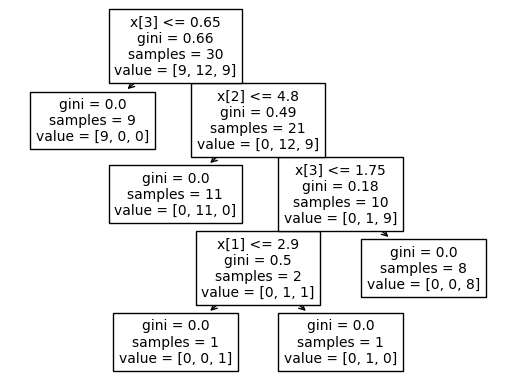

0.9


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
evaluate(dt_bag1,x,y)

In [23]:
#Data for tree 2
df_bag = df_train.sample(30,replace = True)

x = df_bag.iloc[:,[0,1,2,3]]
y = df_bag.iloc[:,4]

df_bag.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
94,5.6,2.7,4.2,1.3,1
106,4.9,2.5,4.5,1.7,2
143,6.8,3.2,5.9,2.3,2


In [24]:
dt_bag2 = DecisionTreeClassifier()

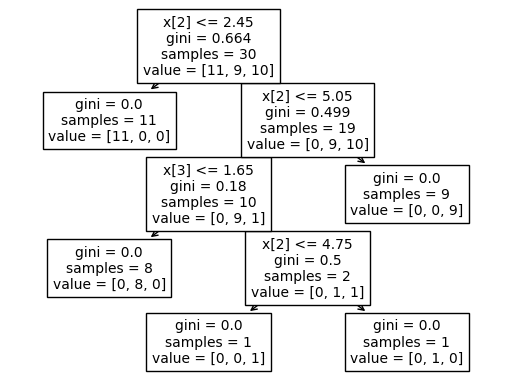

0.9333333333333333


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
evaluate(dt_bag2,x,y)

In [26]:
#Data for tree 3
df_bag = df_train.sample(30,replace = True)

x = df_bag.iloc[:,[0,1,2,3]]
y = df_bag.iloc[:,4]

df_bag.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
108,6.7,2.5,5.8,1.8,2
87,6.3,2.3,4.4,1.3,1
3,4.6,3.1,1.5,0.2,0


In [27]:
dt_bag3 = DecisionTreeClassifier()

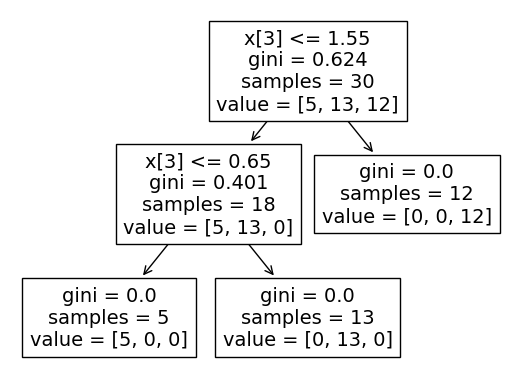

0.9666666666666667


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
evaluate(dt_bag3,x,y)

In [29]:
print("Predictor 1",dt_bag1.predict(np.array([6.1,3.0,4.6,1.4]).reshape(1,4)))
print("Predictor 2",dt_bag2.predict(np.array([6.1,3.0,4.6,1.4]).reshape(1,4)))
print("Predictor 3",dt_bag3.predict(np.array([6.1,3.0,4.6,1.4]).reshape(1,4)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Types of Bagging

### 1. Pasting

In [30]:
#Row sampling without replacement
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,1
71,6.1,2.8,4.0,1.3,1
28,5.2,3.4,1.4,0.2,0
84,5.4,3.0,4.5,1.5,1
130,7.4,2.8,6.1,1.9,2


### 3. Random Subspaces

In [31]:
df.sample(2,replace=True,axis = 1)

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


### 3. Random Patches

In [32]:
df.sample(5,replace=True).sample(2,replace=True,axis = 1)

,species,sepal_width
127,2,3.0
80,1,2.4
15,0,4.4
119,2,2.2
73,1,2.8
